# Random and Repeatable

In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils import *

## Data

In [190]:
data = pd.read_csv('./data/7.csv')
fps = 15968

In [191]:
# Frames and Times
frames = data[[c for c in data if c.startswith('frame')]]
frames -= frames.iloc[0]
t = frames / fps
t_err = 1 / (2 * fps)

r = data[[c for c in data if (c.startswith('diameter') and 'err' not in c)]]/2
r_err = data[[c for c in data if c.startswith('diameter_err')]]/2

## Plot

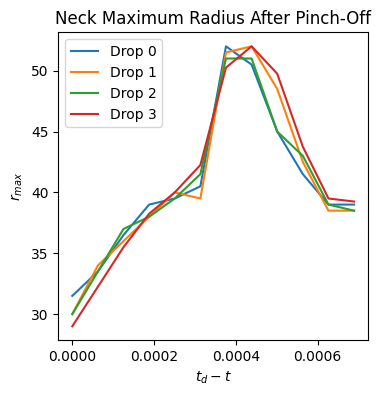

In [192]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(t, r, label=[f'Drop {i}' for i in range(4)])
ax.set_xlabel('$t_d - t$')
ax.set_ylabel('$r_{max}$')
ax.set_title('Neck Maximum Radius After Pinch-Off')
ax.legend()

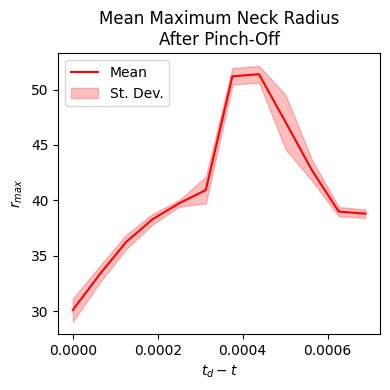

In [194]:
fig, ax = plt.subplots(figsize=(4, 4))

r_mean = r.mean(axis=1)
r_std = r.std(axis=1)

ax.plot(t.iloc[:, 0], r_mean, c='r', label='Mean')
ax.fill_between(t.iloc[:, 0], r_mean - r_std, r_mean + r_std, color='r', alpha=0.25, label='St. Dev.')
ax.set_xlabel('$t_d - t$')
ax.set_ylabel('$r_{max}$')
ax.set_title('Mean Maximum Neck Radius\nAfter Pinch-Off')
ax.legend()
plt.tight_layout()

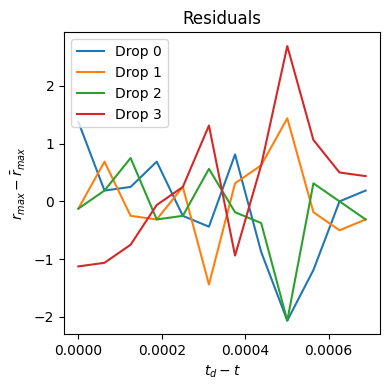

In [196]:
r_res = r - np.expand_dims(r.mean(axis=1).to_numpy(), 1)

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(t, r_res, label=[f'Drop {i}' for i in range(4)])
ax.set_xlabel('$t_d - t$')
ax.set_ylabel('$r_{max} - \\bar{r}_{max}$')
ax.set_title('Residuals')
ax.legend()
plt.tight_layout()